# Script to preprocess the Dog images into a trainable format.

-------------------------------------------------------------------------------------------------------------------
# Technology used: basic preprocessing tools

### Start with importing the usual cells for my tasks

In [29]:
# packages used for processing: 
import matplotlib.pyplot as plt # for visualization
import numpy as np
from scipy.ndimage import imread
from scipy.misc import imresize

# for pickling the data
import cPickle as pickle

# for csv related stuff
import pandas as pd

# for operating system related stuff
import os
import sys # for memory usage of objects
from subprocess import check_output

# to plot the images inline
%matplotlib inline

In [2]:
# Input data files are available in the "../Data/" directory.

def exec_command(cmd):
    '''
        function to execute a shell command and see it's 
        output in the python console
        @params
        cmd = the command to be executed along with the arguments
              ex: ['ls', '../input']
    '''
    print(check_output(cmd).decode("utf8"))

In [3]:
# check the structure of the project directory
exec_command(['ls', '..'])

Data
LICENSE
Models
README.md
Scripts



In [81]:
''' Set the constants for the script '''

# various paths of the files
data_path = "../Data" # the data path

data_files_path = {
    "train": os.path.join(data_path, "train"),
    "test" : os.path.join(data_path, "test")
}

base_model_path = "../Models"
plug_and_play_data_file = os.path.join(data_path, "plug_and_play.pickle")

labels_csv_file = os.path.join(data_path, "labels.csv")

# constants for the preprocessing script
fixed_resize = (128, 128, 3)
batch_size = 64 # 10000 images in each batch
highest_pixel_value = 255 # since color channels are 8 bits.
train_percentage = 95

In [31]:
# get a list of all the files from the data directory
data_files = os.listdir(data_files_path["train"])
data_files[: 3] # view a few files from the directory

['6192909376bd28cd7b82ced40acf3330.jpg',
 'bf121d8d8af31728d8882d30242289e3.jpg',
 'dd48373a8d9f30daf5f7b51a3beb1325.jpg']

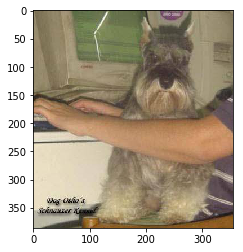

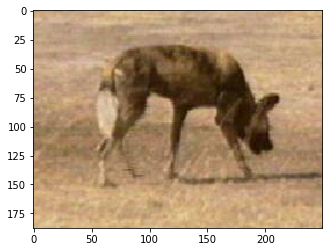

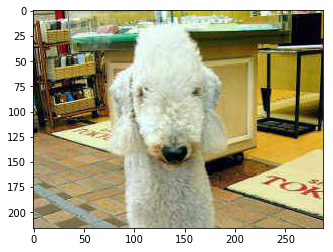

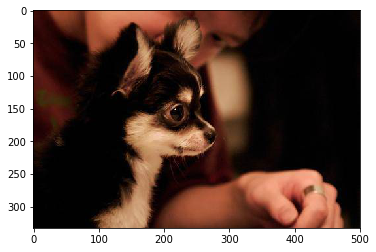

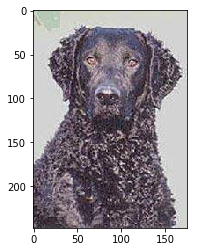

In [32]:
# read and display some random images from this list

for _ in range(5):
    random_index = np.random.randint(len(data_files))

    # read the data from the file
    data_file = os.path.join(data_files_path["train"], data_files[random_index])
    random_image = imread(data_file)

    # plot the random image
    plt.figure() # create a new figure every time this loop iterates
    plt.imshow(random_image); # suppress the unnecessary output

It can be easily observed that the image sizes are not consistent. But, while feeding the images into a deep classifier, we must have a fixed size. So, resize all the images in the dataset to a fixed size.

-------------------------------------------------------------------------------------------------------------------
### The size chosen for this task is: 64 x 64 x 3 
### This is mainly because My system won't be able to process higher res images :( 

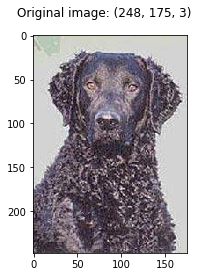

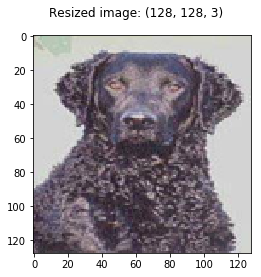

In [33]:
# testing the scipy.misc.imresize method for our task:
plt.figure().suptitle("Original image: " + str(random_image.shape))
plt.imshow(random_image);

# resize the image:
resized_random_image = imresize(random_image, fixed_resize)

plt.figure().suptitle("Resized image: " + str(resized_random_image.shape))
plt.imshow(resized_random_image);

It is good to see that there is not a huge loss of information in resizing. The image has become a bit blurred since the resolution has decreased. However, the spatial information and the most important strokes patterns are preserved.

# Putting it all together: Create a function to extract all the images -> resize them -> and then pickle them into a numpy array

In [34]:
len(data_files) # total images in the dataset

10222

In [35]:
# create a function to process the data and return a numpy array for the same:
def process_data(inpath, log_factor = 100):
    '''
        Function to process the raw images and convert them into batches of 10000 as pickle files.
        @param
        inpath => path to the input files directory.
        log_factor => print a feedback comment after these many iterations. Defaults to 100
        @return => np array of the processed data, the list of file id's
    '''
    
    # get a list of all the files in the dataset.
    files = os.listdir(inpath)
    
    id_list = [] # initialize the id list to empty
    total_images = len(files) # total images in dataset
    
    print "Processing started... " + "\nTotal images: " + str(total_images)
        
    # create an empty numpy array for the data
    data = np.ndarray((total_images, fixed_resize[0], fixed_resize[1], fixed_resize[2]), dtype=np.float32)
        
    # read every image in batch_files, resize it and put the data into data
    for file_index in range(total_images):
        filename = files[file_index]
        
        # extract and append the id of the image file to the id_list
        file_id = filename.split('.')[0]
        id_list.append(file_id)
        
        imgfile = os.path.join(inpath, filename)
        data[file_index] = imresize(imread(imgfile), fixed_resize)
            
        # normalize the images by dividing all the pixel values by highest_pixel_value
        data[file_index] = data[file_index] / highest_pixel_value # normalize them
            
        # log a comment for every 100 images completion:
        if((file_index + 1) % log_factor == 0):
            print "Completed " + str(file_index + 1) + " images..."
    
    # print a feedback message after the porcessing is complete
    print "Processing complete!" 
    
    # return the processed data
    return data, id_list

In [28]:
# execute the processing function to get the output.
X, names = process_data(data_files_path['train'])

Processing started... 
Total images: 10222
Completed 100 images...
Completed 200 images...
Completed 300 images...
Completed 400 images...
Completed 500 images...
Completed 600 images...
Completed 700 images...
Completed 800 images...
Completed 900 images...
Completed 1000 images...
Completed 1100 images...
Completed 1200 images...
Completed 1300 images...
Completed 1400 images...
Completed 1500 images...
Completed 1600 images...
Completed 1700 images...
Completed 1800 images...
Completed 1900 images...
Completed 2000 images...
Completed 2100 images...
Completed 2200 images...
Completed 2300 images...
Completed 2400 images...
Completed 2500 images...
Completed 2600 images...
Completed 2700 images...
Completed 2800 images...
Completed 2900 images...
Completed 3000 images...
Completed 3100 images...
Completed 3200 images...
Completed 3300 images...
Completed 3400 images...
Completed 3500 images...
Completed 3600 images...
Completed 3700 images...
Completed 3800 images...
Completed 3900 i

In [50]:
# print the shapes of X and id_list
print X.shape, len(names)

 (10222, 128, 128, 3) 10222


In [69]:
m_examples = X.shape[0]

# Extract the labels corresponding to these files for the final classification

In [51]:
raw_labels = pd.read_csv(labels_csv_file)

In [63]:
ids = np.array(raw_labels.id); labels = np.array(raw_labels.breed)
print ids.shape, labels.shape
print ids[:3], labels[:3]

(10222,) (10222,)
['000bec180eb18c7604dcecc8fe0dba07' '001513dfcb2ffafc82cccf4d8bbaba97'
 '001cdf01b096e06d78e9e5112d419397'] ['boston_bull' 'dingo' 'pekinese']


In [68]:
# Now create a dictionary for the labels:
reverse_labels_dict = dict(enumerate(sorted(set(raw_labels.breed))))
# display the labels_dict (uncomment the following line)
# reverse_labels_dict

# Create the dictionary for the labels from the reverse dictionary
labels_dict = dict([(v, k) for (k, v) in zip(reverse_labels_dict.keys(), reverse_labels_dict.values())])

In [73]:
# Run a loop to construct the Y for the prepared X
Y = np.ndarray((m_examples, 1), dtype = np.int32)
for ind in range(m_examples):
    Y[ind] = labels_dict[labels[np.where(ids == names[ind])[0][0]]]
print Y

[[ 79]
 [ 57]
 [111]
 ..., 
 [ 64]
 [ 94]
 [107]]


In [75]:
# print the shapes of the two arrays X and Y:
print X.shape, Y.shape

(10222, 128, 128, 3) (10222, 1)


# Perform random shuffling and splitting of the data
link to the repo code -> https://github.com/akanimax/machine-learning-helpers/blob/master/training/data_setup.py

In [76]:
# function to perform synchronous random shuffling of the training data
def synch_random_shuffle_non_np(X, Y):
    '''
        ** This function takes in the parameters that are non numpy compliant dtypes such as list, tuple, etc.
        Although this function works on numpy arrays as well, this is not as performant enough
        @param
        X, Y => The data to be shuffled
        @return => The shuffled data
    '''
    combined = zip(X, Y)

    # shuffle the combined list in place
    np.random.shuffle(combined)

    # extract the data back from the combined list
    X[:], Y[:] = zip(*combined)

    # return the shuffled data:
    return X, Y

In [77]:
X, Y = synch_random_shuffle_non_np(X, Y)

In [80]:
# function to split the data into train - dev sets:
def split_train_dev(X, Y, train_percentage):
    '''
        function to split the given data into two small datasets (train - dev)
        @param
        X, Y => the data to be split
        (** Make sure the train dimension is the first one)
        train_percentage => the percentage which should be in the training set.
        (**this should be in 100% not decimal)
        @return => train_X, train_Y, test_X, test_Y
    '''
    m_examples = len(X)
    assert train_percentage < 100, "Train percentage cannot be greater than 100! NOOB!"
    partition_point = int((m_examples * (float(train_percentage) / 100)) + 0.5) # 0.5 is added for rounding

    # construct the train_X, train_Y, test_X, test_Y sets:
    train_X = X[: partition_point]; train_Y = Y[: partition_point]
    test_X  = X[partition_point: ]; test_Y  = Y[partition_point: ]

    assert len(train_X) + len(test_X) == m_examples, "Something wrong in X splitting"
    assert len(train_Y) + len(test_Y) == m_examples, "Something wrong in Y splitting"

    # return the constructed sets
    return train_X, train_Y, test_X, test_Y

In [82]:
train_X, train_Y, test_X, test_Y = split_train_dev(X, Y, train_percentage)

In [83]:
print train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

(9711, 128, 128, 3) (9711, 1) (511, 128, 128, 3) (511, 1)


# Pickle this processed data using the helper function from the celeberated repository! (lmao)
-------------------------------------------------------------------------------------------------------------------
link to repo -> https://github.com/akanimax/machine-learning-helpers/blob/master/pickling_unpickling/pickling_operations.py

In [87]:
# function to pickle an object
def pickleIt(obj, save_path):
    '''
        function to pickle the given object.
        @param
        obj => the python object to be pickled
        save_path => the path where the pickled file is to be saved
        @return => nothing (the pickle file gets saved at the given location)
    '''
    if(not os.path.isfile(save_path)):
        with open(save_path, 'wb') as dumping:
            pickle.dump(obj, dumping, protocol=pickle.HIGHEST_PROTOCOL)

        print "The file has been pickled at: " + save_path

    else:
        print "The pickle file already exists: " + save_path

In [88]:
# create a dictionary to pickle into a file
data_dict = {
    'train_X': train_X,
    'train_Y': train_Y,
    'test_X' : test_X,
    'test_Y' : test_Y,
    'labels_dict': labels_dict,
    'reverse_labels_dict': reverse_labels_dict
}

In [89]:
# pickle this data using the utility function
pickleIt(data_dict, plug_and_play_data_file)

The file has been pickled at: ../Data/plug_and_play.pickle


# Alright! So the preprocessing is complete. Let's now move on to the Classifier building